# TAKE HOME QUIZ 1.B
Lucieni Saldanha

## Activities

    - Pick some data set (ground truth)
    - Generate a prediction set ( to be compared to ground truth)
    - Analyze predictions and ground truth applying evalution metrics, and explain results
    

## Actual and Prediction Data

In [1]:
# Download a training set from kaggle ( Titanic challenge - binary classification)
# transform csv file to a pandas dataframe 
import pandas as pd
data = pd.read_csv("./train.csv")
data.shape

(891, 12)

We see that our dataset has 891 rows of data, and 12 columns.

In [2]:
# visualize the list of columns in dataframe/dataset
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
# visualize the first 5 rows of our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We are only interested in the column 'Survived', to obtain a list of 0 and 1. The 'Survived' column with value equal to 0 meant the person did not survive , and for the value equal to 1 the person survived.

In [4]:
# select only column needed for evaluation
is_survived = data.Survived
print(is_survived.head(10))

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


In [5]:
# check for integrity of selected values
print(len(is_survived))

891


Lets generate a random list (that will be our predictions list), and populate it with 0 and 1.

In [6]:
# generate a list with 891 elements, and shuffle elements.
import random
model_predictions = [0] * 445 + [1] * 446

random.shuffle(model_predictions)

print(model_predictions[0:10])


[0, 1, 1, 1, 0, 1, 1, 1, 0, 0]


In [7]:
# turn list into a dataframe
model_predictions_df = pd.DataFrame(model_predictions, columns=["Prediction"])

print(model_predictions_df.shape)


(891, 1)


In [8]:
# print first 10 rows of predicted data
print(model_predictions_df.head(10))

   Prediction
0           0
1           1
2           1
3           1
4           0
5           1
6           1
7           1
8           0
9           0


So far, we have obtained a data set with real values, is_survived, and generated a prediction data set, model_predictions_df.


## Evaluation
We need to evaluate the data is_survived and the model_predictions_df, using evaluation metrics for our binary classification problem.
The metrics to be used:
    
    - Accuracy 
    - Precision-Recall
    - ROC_AUC
    - Log-loss
     

### Accuracy

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import dummy, metrics
from sklearn.dummy import DummyClassifier

# check for confusion matrix

conf_ma = confusion_matrix(is_survived, model_predictions_df)
conf_ma_df = pd.DataFrame(conf_ma)

print(conf_ma_df.head())


     0    1
0  275  274
1  170  172


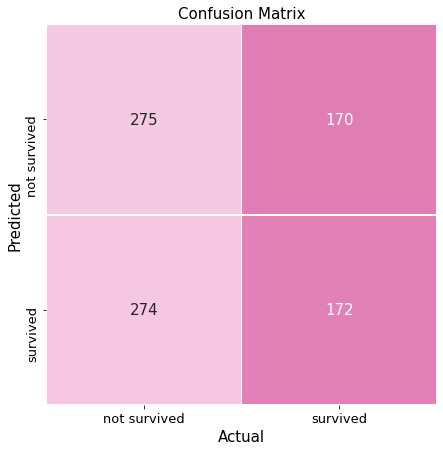

In [23]:
# show Confusion Matrix
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_dummy_df.T, annot=True, annot_kws={"size": 15}, cmap="PiYG", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["not survived","survived"], yticklabels=["no fraud","survived"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["not survived","survived"], fontsize=13)
ax.set_yticklabels(["not survived","survived"], fontsize=13)
plt.title("Confusion Matrix", fontsize=15)

plt.show()

From the data frame matrix, the true positive, true negative, false positive and false negative values are:

In [32]:
tp = conf_ma_df.iloc[1,1]
tn = conf_ma_df.iloc[0,0]
fp = conf_ma_df.iloc[0,1]
fn = conf_ma_df.iloc[1,0]
print(f"True Positive: {tp}",f"True Negative: {tn}",f"False Positive: {fp}",f"False Negative: {fn}", sep='\n' )

True Positive: 172
True Negative: 275
False Positive: 274
False Negative: 170


In [33]:
# calculate accuracy of our random model 
accuracy = (tp + tn)/(tp + tn + fp + fn)
print(accuracy)

0.5016835016835017


Our model can predict outcomes with a 50.17% accuracy.

Checking the sensitivity, and specificity of our model:


In [35]:
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivy value for our model: {sensitivity}.",f"Specificity value for our model: {specificity}.", sep="\n")

Sensitivy value for our model: 0.5029239766081871.
Specificity value for our model: 0.5009107468123861.


### R